### Handwritten Digit Classification with Neural Networks using TensorFlow

This project involves building a neural network to identify handwritten digits using the **MNIST dataset**. The model is trained on a set of 60,000 images of handwritten digits and evaluated on 10,000 images. The goal is to classify the digits (0-9) in new images.


### 1. Import Libraries

The required libraries are imported to handle the dataset, build the model, and visualize the results. **TensorFlow** is used for building and training the neural network, **NumPy** is for handling numerical operations, and **Matplotlib** is used for visualizations.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


### 2. Load and Preprocess the MNIST Dataset

The **MNIST dataset** is loaded directly from TensorFlow. The dataset consists of 28x28 pixel grayscale images of handwritten digits. We then normalize the pixel values by scaling them between 0 and 1 to help the neural network learn more efficiently.

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the images to have values between 0 and 1 by dividing by 255
x_train, x_test = x_train / 255.0, x_test / 255.0

# Check the shape of the data
print(x_train.shape) 
print(y_train.shape) 


(60000, 28, 28)
(60000,)



### 3. Define the Neural Network Model

A simple **neural network** is defined using the **Sequential API** from **Keras**. The network includes:
- A **Flatten layer** to convert the 28x28 image matrix into a 1D vector.
- A **Dense (fully connected) layer** with 128 neurons and ReLU activation, which introduces non-linearity to the model.
- An **output layer** with 10 neurons (one for each digit) and **softmax activation** to output probabilities for each class.

### 4. Compile the Model

The model is compiled by specifying the **optimizer**, **loss function**, and **metrics**:
- The **Adam optimizer** is used to update the weights during training.
- **Sparse categorical crossentropy** is used as the loss function because this is a multi-class classification problem.
- The **accuracy metric** is used to evaluate the model's performance during training and testing.

In [3]:
# Build the model
model = models.Sequential([
    # Flatten the 28x28 images into 1D array of 784 pixels
    layers.Flatten(input_shape=(28, 28)),
    
    # Add a fully connected (dense) layer with 128 neurons and ReLU activation function
    layers.Dense(128, activation='relu'),
    
    # Add an output layer with 10 neurons (one for each digit)
    layers.Dense(10, activation='softmax')  # Softmax for multi-class classification
])

# Compile the model with loss function, optimizer, and metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



d:\RazonCoding\machine learning\p310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### 5. Train the Model

The model is trained on the training data for a specified number of **epochs** and **batch size**. During training, the model updates its weights to minimize the loss. The training process also includes **validation** using a portion of the training data to monitor the model's performance on unseen data.

In [4]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8503 - loss: 0.5317 - val_accuracy: 0.9603 - val_loss: 0.1452
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9552 - loss: 0.1542 - val_accuracy: 0.9697 - val_loss: 0.1043
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9698 - loss: 0.1039 - val_accuracy: 0.9752 - val_loss: 0.0912
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9782 - loss: 0.0748 - val_accuracy: 0.9767 - val_loss: 0.0813
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9822 - loss: 0.0606 - val_accuracy: 0.9763 - val_loss: 0.0809
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9866 - loss: 0.0461 - val_accuracy: 0.9767 - val_loss: 0.0789
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9888 - loss: 0.0394 - val_accuracy: 0.9785 - val_loss: 0.0803
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9920 - loss: 0.0298 - val_accuracy: 0.

### 6. Evaluate the Model

Once training is complete, the model is evaluated on the test dataset to assess how well it generalizes to new data. The accuracy on the test set is reported to determine the model's effectiveness.

In [5]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")


313/313 - 0s - 1ms/step - accuracy: 0.9792 - loss: 0.0772
Test accuracy: 0.979200005531311


### 7. Make Predictions

After the model is trained, it can be used to make predictions on the test images. One test image is visualized, and both the predicted label and the actual label are displayed to compare the model's output with the ground truth.




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


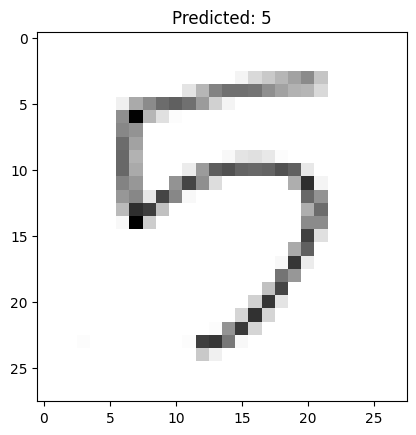

Actual label: 5


In [6]:
from PIL import Image
# 1. Load your custom image (replace 'your_image.png' with your image file path)
img = Image.open(r'5.jpg')

# 2. Convert the image to grayscale (if it's not already)
img = img.convert('L')

# 3. Resize the image to 28x28 pixels (the size of MNIST images)
img = img.resize((28, 28))

# Invert the grayscale values (255 - pixel value)
img = Image.fromarray(255 - np.array(img))

# 4. Convert the image to a numpy array and normalize the pixel values
img_array = np.array(img) / 255.0  # Normalize to [0, 1] range

# 5. Reshape the image to match the model input format (28, 28, 1)
img_array = img_array.reshape(1, 28, 28, 1)

# Predict on the test set
predictions = model.predict(img_array)

# Display the first test image and the predicted digit
plt.imshow(img, cmap=plt.cm.binary)  # Show the first image in the test set
plt.title(f"Predicted: {np.argmax(predictions)}")  # Display predicted digit
plt.show()

# Check the actual label
print(f"Actual label: {np.argmax(predictions)}")


In [7]:
print(model.input_shape)

(None, 28, 28)


In [8]:
x_test.shape[0]

10000

In [9]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


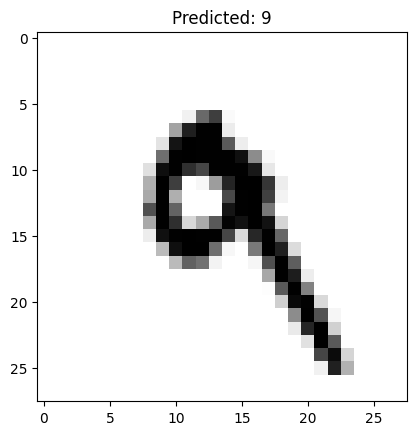

Actual label: 9


In [11]:
# Predict on the test set
predictions = model.predict(x_test)

# Display the first test image and the predicted digit
plt.imshow(x_test[7], cmap=plt.cm.binary)  # Show the first image in the test set
plt.title(f"Predicted: {np.argmax(predictions[7])}")  # Display predicted digit
plt.show()

# Check the actual label
print(f"Actual label: {y_test[7]}")


### 8. Visualizing the Training Process

The **training accuracy** and **loss** over each epoch, as well as the **validation accuracy** and **loss**, are plotted to provide insights into the model's learning behavior. This helps in identifying if the model is overfitting (learning too much from the training data) or underfitting (not learning enough).

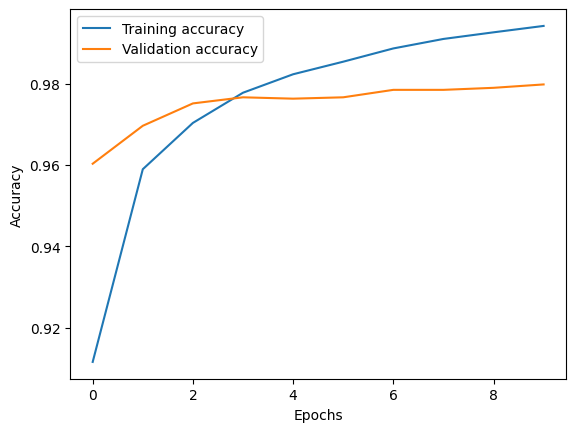

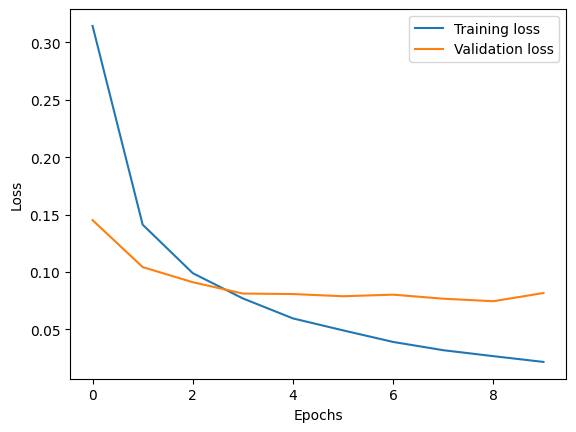

In [12]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Conclusion

This neural network is trained to classify handwritten digits using the **MNIST dataset**. The model achieves a reasonable **test accuracy**, and visualizations of the training process help us understand how well the model is learning. The performance can be further improved by experimenting with different model architectures, hyperparameters, and training techniques.